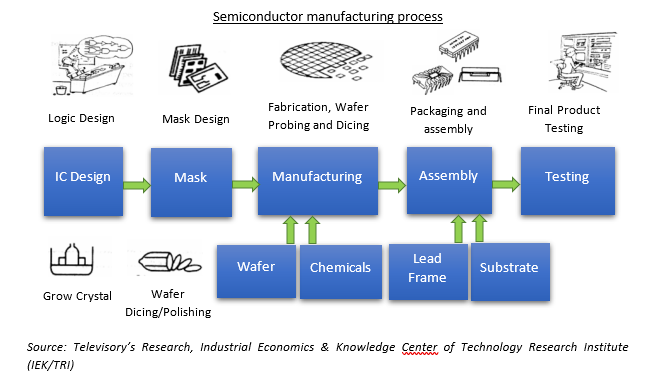

## SECOM(SEmiCOnductor Manufacturing) 데이터셋
* 반도체 제조 공정에서 수집된 데이터입니다.
* 1567개의 샘플과 591개의 특성을 가지고 있으며, 각 샘플은 "Pass/Fail"(제품의 합격/불합격 여부 (1 = 불합격, -1 = 합격)) 레이블로 분류됩니다.
* 이 중 104개의 샘플이 실패(Fail)로 분류되어 있습니다.
* [SECOM - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/179/secom)
* [UCI SECOM Dataset | Kaggle](https://www.kaggle.com/paresh2047/uci-semcom?select=uci-secom.csv)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("uci-secom.csv")
df.shape

In [ ]:
df.head()

In [ ]:
df.info()

주어진 DataFrame `df`에 대해 기본 탐색적 데이터 분석(EDA)을 수행하기 위해 데이터 구조, 요약 통계, 결측값, 상관관계 등을 분석합니다. 다음은 EDA 수행 단계별 설명입니다:

### 1. DataFrame 구조 이해하기
- DataFrame `df`는 **1567개의 행**과 **592개의 열**을 가지고 있습니다.
- 열에는 시간 기반 열(`Time`), float64 타입 열, int64 타입 열 (`Pass/Fail`), 그리고 object 타입 열이 포함되어 있습니다(`Time`이 datetime 형식으로 변환되지 않은 경우).

### 2. 데이터 타입 변환
- `Time` 열이 datetime 형식이 아니라면 이를 datetime으로 변환합니다.

```python

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df.describe().transpose()

In [ ]:
desct = df.describe(include="number").T
desct.columns = ['Tcount', 'Tmean', 'Tstd', 'Tmin', 'T25%', 'T50%', 'T75%', 'Tmax']
desct

In [ ]:
desct.describe()

In [ ]:
desct.hist(bins=50, figsize=(12, 12));

In [ ]:
df.notnull().sum().hist()

In [ ]:
df.isnull().sum().nlargest(20)

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="Greys_r")

In [ ]:
null_sum = df.isnull().sum() 
null_sum[null_sum > 10]

In [ ]:
num_max = df.select_dtypes(include=np.number).max().max()
num_max

In [ ]:
num_min = df.select_dtypes(include=np.number).min().min()
num_min

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.select_dtypes(include=np.number), cmap="seismic")

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.select_dtypes(include=np.number), cmap="seismic", vmin=-10000, vmax=10000 )

In [ ]:
# 제품의 합격/불합격 여부 (1 = 불합격, -1 = 합격)
df["Pass/Fail"].value_counts()

In [ ]:
df["Pass/Fail"].value_counts(1)

In [ ]:
sns.countplot(data=df, x="Pass/Fail")

In [ ]:
corr = df.corr(numeric_only=True)
corr

In [ ]:
sns.heatmap(corr, vmin=-1, vmax=1, cmap="seismic", mask=np.tril(np.ones_like(corr)))

In [ ]:
df.nunique().describe()

In [ ]:
n_unique = df.nunique()
uniq_1 = n_unique[n_unique == 1]
uniq_1.index

In [ ]:
df_1 = df[uniq_1.index]
df_1

In [ ]:
df_1.describe().T.describe()

In [ ]:
df.mean(numeric_only=True).plot()

In [ ]:
df.select_dtypes(include="number").agg(["min", "max"]).T.plot()

In [ ]:
df.describe(include="number").T["std"].plot(kind="box")

In [ ]:
df.describe(include="number").T.plot.box()

In [ ]:
df_num = df.select_dtypes(include="number")
df_norm = (df_num - df_num.mean()) / df_num.std()
df_norm

In [ ]:
df_norm.describe().T.describe().round(2)

In [ ]:
df_norm.describe(include="number").T.iloc[:, 1:].plot.box()